In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textwrap import wrap
from scipy.stats import gmean
import sarchl

rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
dcu_data = pd.read_csv('./DCUscalar_mb.csv',index_col=0)
# print(dcu_data.columns)
dcu_data['64'] = dcu_data['64']/dcu_data['8']
dcu_data['32'] = dcu_data['32']/dcu_data['8']
dcu_data['16'] = dcu_data['16']/dcu_data['8']
dcu_data['8'] = dcu_data['8']/dcu_data['8']
dcu_data.columns=['Benchmark','32','64','128','256']
# dcu_data

dcu_data = dcu_data.melt(id_vars=['Benchmark'],value_vars=['32','64','128','256'])
dcu_data.columns=['Benchmark','NumDCU','Normalized\nExecution Time']

In [9]:
dcu_data

Benchmark NumDCU  Normalized\nExecution Time
0       ATAX     32                    1.000000
1       BICG     32                    1.000000
2         BS     32                    1.000000
3        FIR     32                    1.000000
4        FLW     32                    1.000000
5        FWT     32                    1.000000
6         KM     32                    1.000000
7         MT     32                    1.000000
8         PR     32                    1.000000
9       ReLU     32                    1.000000
10      SPMV     32                    1.000000
11      ATAX     64                    0.929981
12      BICG     64                    1.023040
13        BS     64                    0.990712
14       FIR     64                    0.508351
15       FLW     64                    1.060001
16       FWT     64                    0.546781
17        KM     64                    0.533004
18        MT     64                    0.540620
19        PR     64                    0.999394
20      ReLU     64                    0.999996
21      SPMV     64                    0.640641
22      ATAX    128                    0.945537
23      BICG    128                    1.016292
24        BS    128                    0.871751
25       FIR    128                    0.420959
26       FLW    128                    0.653024
27       FWT    128                    0.505574
28        KM    128                    0.267729
29        MT    128                    0.351988
30        PR    128                    0.999357
31      ReLU    128                    0.999996
32      SPMV    128                    0.633394
33      ATAX    256                    0.993433
34      BICG    256                    1.032980
35        BS    256                    0.869276
36       FIR    256                    0.413511
37       FLW    256                    0.538558
38       FWT    256                    0.467084
39        KM    256                    0.132910
40        MT    256                    0.320954
41        PR    256                    0.999300
42      ReLU    256                    0.999995
43      SPMV    256                    0.622153

In [10]:
palt = sarchl.sequential_palette(4)
palt

['#02090a', '#1b5f71', '#3bb1d1', '#a2dae9']

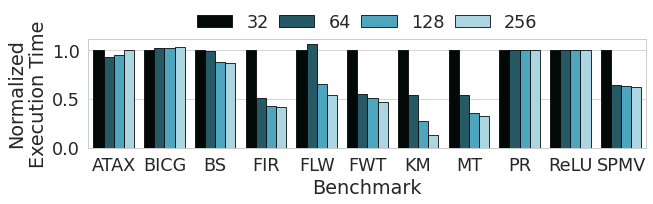

In [11]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(data=dcu_data, 
            x='Benchmark', hue='NumDCU', y='Normalized\nExecution Time', 
            palette=palt, ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.15), loc=10, ncol=5)
# ax.set_ylim(0.9, 1.70)
# ax.set_yticks([1.0, 1.3, 1.6])
plt.savefig('DCUscalar_mb.pdf', bbox_inches='tight')
plt.show()
